In [ ]:
# This is a tutorial to run a simulation using KGBM

In [26]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# import KGBM from ./src
import sys
sys.path.append('./src/')
import KGBN 


In [27]:
# import a network
network = pd.DataFrame({"1":["X","Y","activate"],
                        "2":["X","X","activate"],
                        "3":["X","Z","activate"],
                        "4":["Y","X","activate"],
                        "5":["Y","Y","activate"],
                        "6":["Y","Z","inhibit"],
                        "7":["Z","Z","activate"]
})

network = network.transpose()
network.columns = ["node1","node2","Operation"]

# Analyze the structure of the network
# Load initial network data
#network = pd.read_csv('/Users/guangrong/Documents/GitHub_project/AML digital twin/script/FLT3_NPM1_DNMT3A_model1.csv')
#network = pd.read_csv('/Users/guangrong/Documents/GitHub_project/AML digital twin/script/FLT3_NPM1_DNMT3A_add.csv')

#print("starting nodes:")
#print(set(network['node1']) - set(network['node2']))

#print("ending nodes:")
#print(set(network['node2']) - set(network['node1']))

#print("all nodes:")
#print(len(set(network['node1']) | set(network['node2'])))



In [28]:
# random initial values
all_nodes = list(set(network['node1']) | set(network['node2']))
initial_values = [random.choice([True,False]) for i in range(0,len(all_nodes))]
dic_nodes_incoming = KGBN.generate_dic_node_upstream(network)


AttributeError: module 'KGBN' has no attribute 'generate_dic_node_upstream'

In [9]:

# random initial values
initial_values = [random.choice([True,False]) for i in range(0,len(all_nodes))]
curr_initial_values = initial_values.copy()
#initial_values = curr_initial_values
#initial_values = [True] * len(all_nodes)
dic_nodes_incoming = dic_node_income(network)
print(curr_initial_values)
model_initial = initial_model(all_nodes=all_nodes, initial_values=initial_values)

simulations = update_models_multisteps(model_initial,dic_nodes_incoming, runs = 10000, fliprop=0.05)
#simulations = model_update_withNoise(model_initial,dic_nodes_incoming, runs = 100)

# Convert the simulation results to dataframe so True will became 1 and False will became 0
for node in simulations.keys():
    simulations[node] = [int(x) for x in simulations[node]]
simulations = pd.DataFrame(simulations)  

# heatmap of the simulation results


['Z', 'X', 'Y']
[True, False, True]


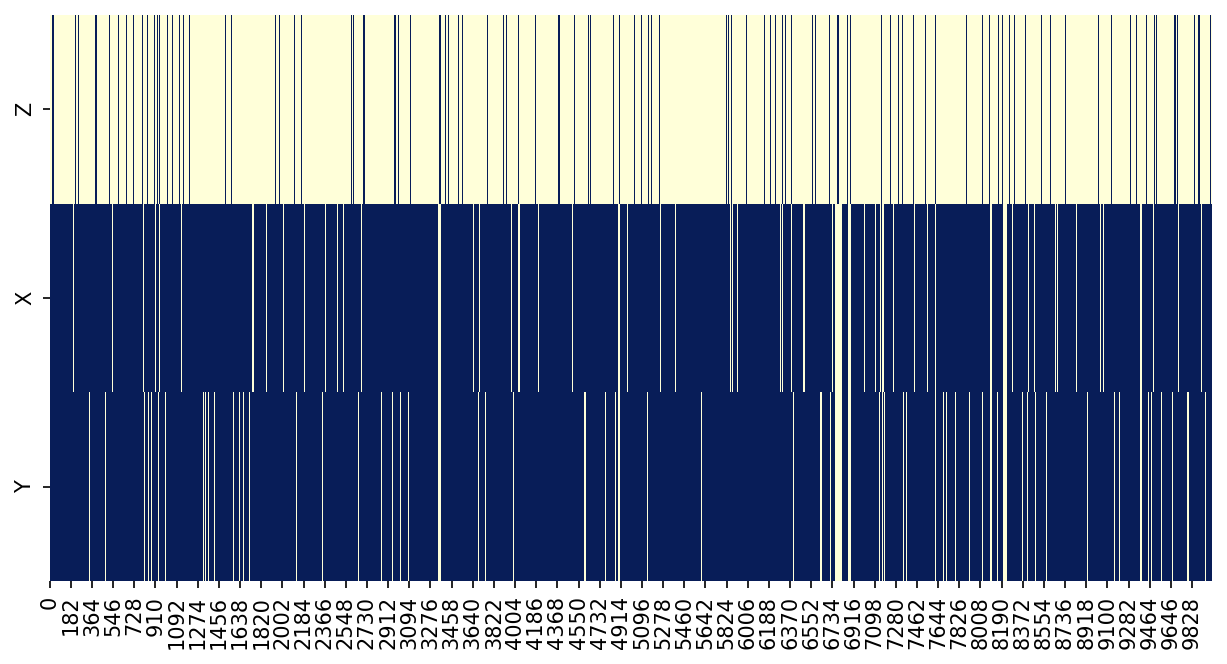

In [10]:
plt.figure(figsize=(10,5), dpi = 150)
# heapmap without clustering
#
sns.heatmap(simulations.transpose(),cmap="YlGnBu", cbar = False)
plt.show()


In [69]:
X1 = simulations.loc[simulations['X'] == 1,] 
X1Y1 = X1.loc[X1['Y'] == 1,]
X1Y1Z1 = X1Y1.loc[X1Y1['Z'] == 1,]
X1Y1Z0 = X1Y1.loc[X1Y1['Z'] == 0,]
X1Y0 = X1.loc[X1['Y'] == 0,]
X1Y0Z1 = X1Y0.loc[X1Y0['Z'] == 1,]
X1Y0Z0 = X1Y0.loc[X1Y0['Z'] == 0,]
X0 = simulations.loc[simulations['X'] == 0,]
X0Y1 = X0.loc[X0['Y'] == 1,]
X0Y1Z1 = X0Y1.loc[X0Y1['Z'] == 1,]
X0Y1Z0 = X0Y1.loc[X0Y1['Z'] == 0,]
X0Y0 = X0.loc[X0['Y'] == 0,]
X0Y0Z1 = X0Y0.loc[X0Y0['Z'] == 1,]
X0Y0Z0 = X0Y0.loc[X0Y0['Z'] == 0,]



In [70]:
result_df = pd.DataFrame({"state":["X0Y0Z0","X0Y0Z1","X0Y1Z0","X0Y1Z1","X1Y0Z0","X1Y0Z1","X1Y1Z0","X1Y1Z1"],
                         "ratio":[X0Y0Z0.shape[0]/simulations.shape[0], 
 X0Y0Z1.shape[0]/simulations.shape[0], 
 X0Y1Z0.shape[0]/simulations.shape[0],
 X0Y1Z1.shape[0]/simulations.shape[0], 
 X1Y0Z0.shape[0]/simulations.shape[0],
 X1Y0Z1.shape[0]/simulations.shape[0], 
 X1Y1Z0.shape[0]/simulations.shape[0], 
 X1Y1Z1.shape[0]/simulations.shape[0]]})

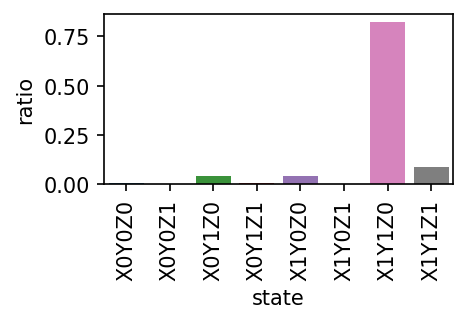

In [71]:

#barplot of result_df

plt.figure(figsize=(3,1.5), dpi = 150)
sns.barplot(x = "state", y = "ratio", data = result_df)
plt.xticks(rotation = 90)
plt.show()

